# libs


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# show data

In [5]:
df=pd.read_csv("/content/titanic.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

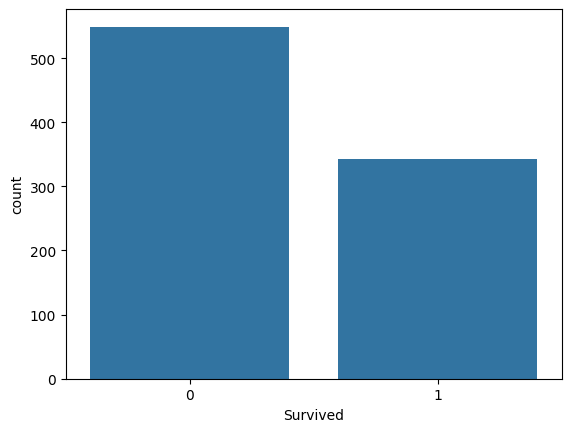

In [11]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

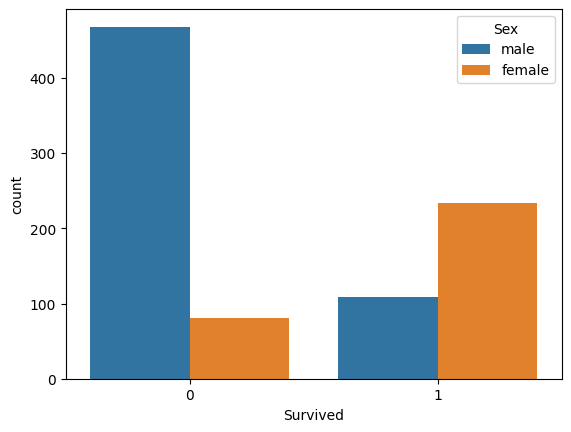

In [12]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [13]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


<Axes: xlabel='Survived', ylabel='count'>

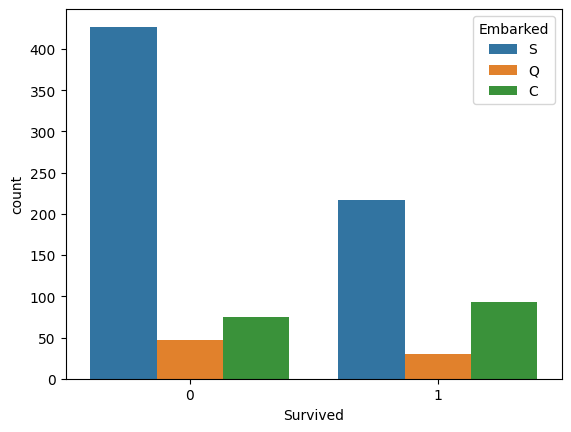

In [14]:
sns.countplot(x='Survived',hue='Embarked',data=df)

In [15]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Survived', ylabel='count'>

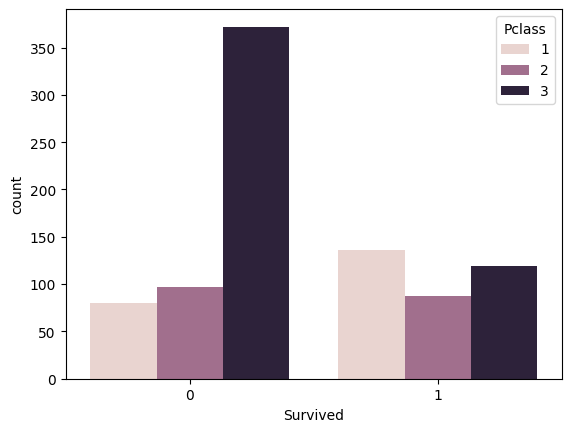

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=df)

<Axes: >

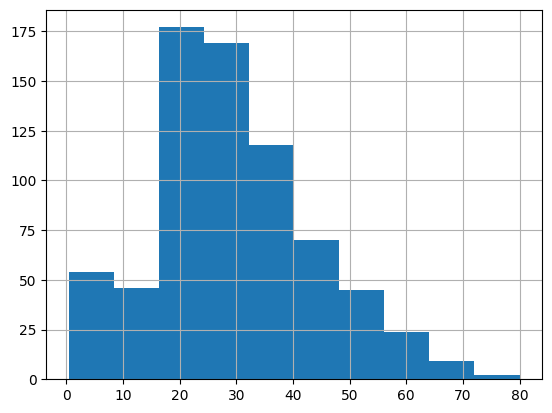

In [17]:
df.Age.hist()

<Axes: xlabel='Age'>

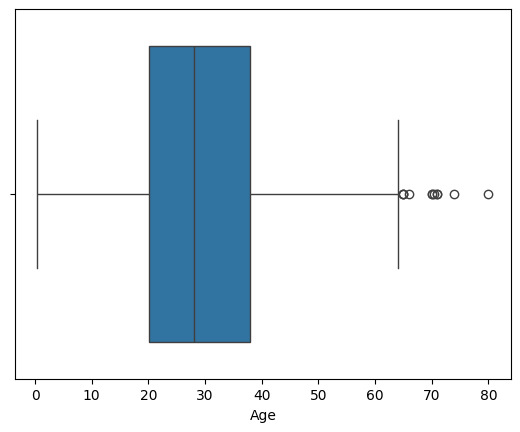

In [18]:
sns.boxplot(data=df,x='Age')

<Axes: xlabel='Fare'>

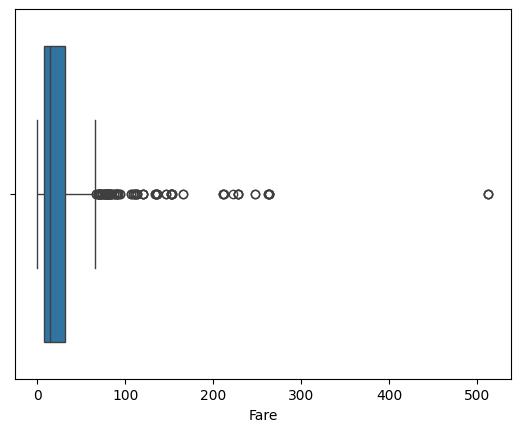

In [19]:
sns.boxplot(data=df,x='Fare')

#PEPROCESSING

##1- feature selection

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [23]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 2- Handle Null Values

<Axes: xlabel='Pclass', ylabel='Age'>

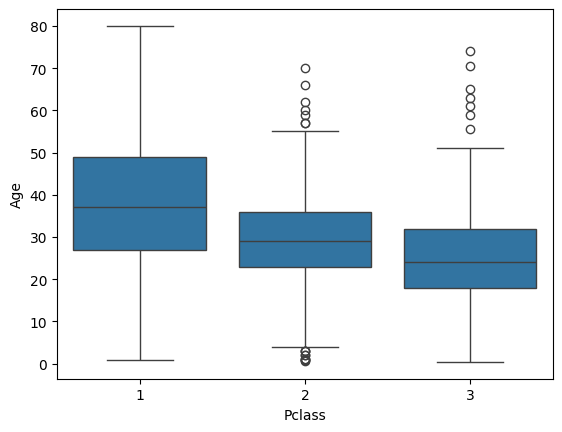

In [24]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [25]:
def im_nulls(colm):
  age=colm[0]
  pclass=colm[1]
  if pd.isnull(age):
    if pclass==1:
      return 38
    elif pclass==2:
      return 29
    else:
      return 24
  else:
    return age

In [26]:
df['Age']=df[['Age','Pclass']].apply(im_nulls,axis=1)

In [27]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [28]:
from ast import mod
df.Embarked.fillna(df['Embarked'].mode()[0],inplace=True)

In [29]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


## 3- Outliers

<Axes: xlabel='Age'>

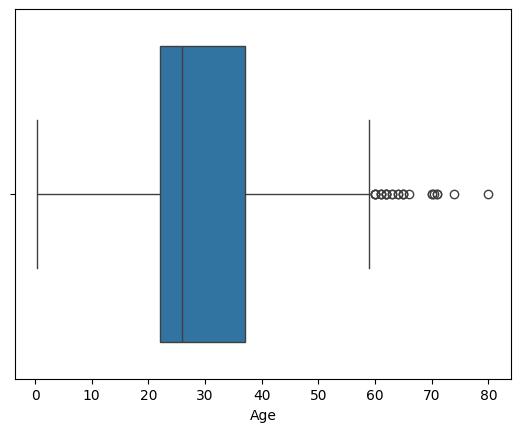

In [31]:
sns.boxplot(x='Age',data=df)

In [37]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Remove
df = df[(df['Age'] >= lower_bound) & (df['Age']<= upper_bound)]

<Axes: xlabel='Fare'>

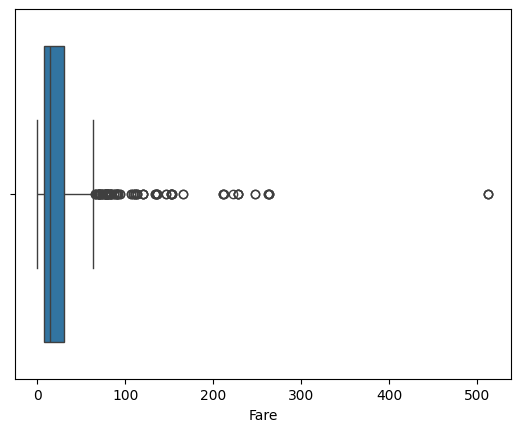

In [33]:
sns.boxplot(x='Fare',data=df)

In [43]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Remove
df = df[(df['Fare'] >= lower_bound) & (df['Fare']<= upper_bound)]

<Axes: xlabel='Fare'>

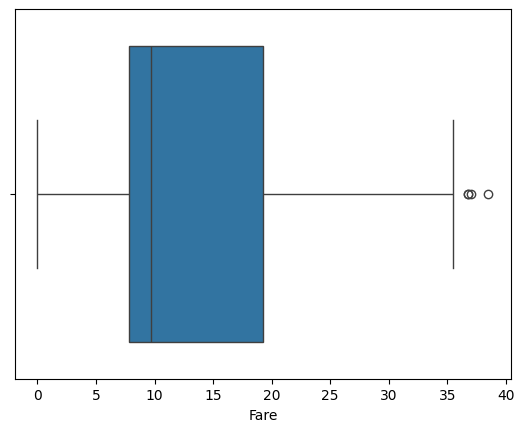

In [44]:
sns.boxplot(x='Fare',data=df)

<Axes: xlabel='Age'>

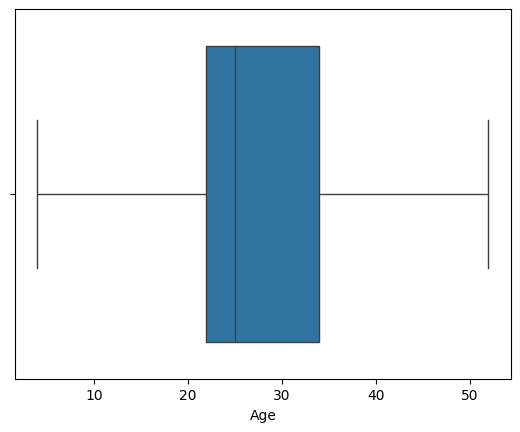

In [38]:
sns.boxplot(x='Age',data=df)

# encoding

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  646 non-null    int64  
 1   Pclass    646 non-null    int64  
 2   Sex       646 non-null    object 
 3   Age       646 non-null    float64
 4   SibSp     646 non-null    int64  
 5   Parch     646 non-null    int64  
 6   Fare      646 non-null    float64
 7   Embarked  646 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 45.4+ KB


In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
en=LabelEncoder()

In [50]:
df['Sex']=en.fit_transform(df['Sex'])
df['Embarked']=en.fit_transform(df['Embarked'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 646 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  646 non-null    int64  
 1   Pclass    646 non-null    int64  
 2   Sex       646 non-null    int64  
 3   Age       646 non-null    float64
 4   SibSp     646 non-null    int64  
 5   Parch     646 non-null    int64  
 6   Fare      646 non-null    float64
 7   Embarked  646 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 45.4 KB


In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
2,1,3,0,26.0,0,0,7.9250,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,24.0,0,0,8.4583,1
8,1,3,0,27.0,0,2,11.1333,2


# splitting

In [54]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [57]:
x_train.shape

(516, 7)

In [58]:
x_test.shape

(130, 7)

# classification -> logistic regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
lg=LogisticRegression()

In [61]:
lg.fit(x_train,y_train)

LogisticRegression()

In [63]:
y_pred=lg.predict(x_test)

In [64]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

# performance

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,y_pred)

0.8461538461538461

In [68]:
# test train acc
y_pred_train=lg.predict(x_train)

In [69]:
accuracy_score(y_train,y_pred_train)

0.8217054263565892